<a href="https://colab.research.google.com/github/sergiyenkoalina/machine-learning-course/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
medical_df=pd.read_csv('/content/drive/MyDrive/data/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 Ідеї для вирішення задачі прогнозування колонки charges на основі інших колонок:
 1. Дослідити окремо кожне поле (розподіл, описова статистика, кількість унікальних даних)
 2. Дослідити вплив кожного з полей (age,	sex, bmi,	children,	smoker,	region) на charges.
 3. Побудувати попарні графіки впливу змінних на charges, де це можливо


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=px.colors.qualitative.Antique,
                   title='Sex/Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**:


*   Для чоловіків більший розмах у значеннях, тоді як жіночі показники більше зконцентровані навколо медіани.

*   У жінок значно рідше зустрічаються charges понад 30k.



In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=px.colors.qualitative.Antique,
                   title='Region/Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**:


*   Медіани у всіх регіонів різні, але лежать у проміжку від 8,7 до 10,1k.
*   У регіонах southeast і northeast спостерігається ширший діапазон charges витрат, але менше екстремальних значень.
* У всіх регіонах більшість charges зосереджена в діапазоні від 0 до 20k.


**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [7]:
px.histogram(medical_df, x='smoker', color='region', title='Smokers/Regions', color_discrete_sequence=px.colors.qualitative.Antique,)

**Спостереження:**
* У всіх регіонах кількість некурців набагато перевищує кількість курців.
* Частка курців і некурців приблизно однакова в кожному регіоні, що свідчить про відсутність значного регіонального впливу на цю поведінку.
* Найменша кількість курців спостерігається у southwest та northwest, тоді як southeast має трохи більшу частку.

In [8]:
fig = px.scatter(medical_df,
                 x='children',
                 y='charges',
                 marginal_x='box',
                 color='smoker',
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

**Спостереження**:


*   Збільшення кількості дітей, здається, не є ключовим фактором для різкого підвищення charges.
*   Медичні витрати виглядають більш залежними від статусу курця, ніж від кількості дітей.


**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [9]:
fig = px.violin(medical_df,
                 x='children',
                 y='charges',
               #  color='smoker',
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 hover_data=['sex'],
                 title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

**Спостереження**:


*   Для всіх груп за кількістю дітей витрати мають подібну форму розподілу, з основним скупченням в нижчому діапазоні (0–20 тисяч).Зі збільшенням кількості дітей немає суттєвого зсуву або зростання медичних витрат.

* Для всіх категорій (від 0 до 5 дітей) є невелика кількість випадків із високими витратами (до 50–70 тисяч), що вказує на наявність аномальних або специфічних медичних ситуацій, які можуть бути поясненими іншими факторами.
*   Кількість дітей не має значного впливу на медичні витрати.



**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [10]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [11]:
def estimate_charges(age, w, b):
    return w * age + b

In [12]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

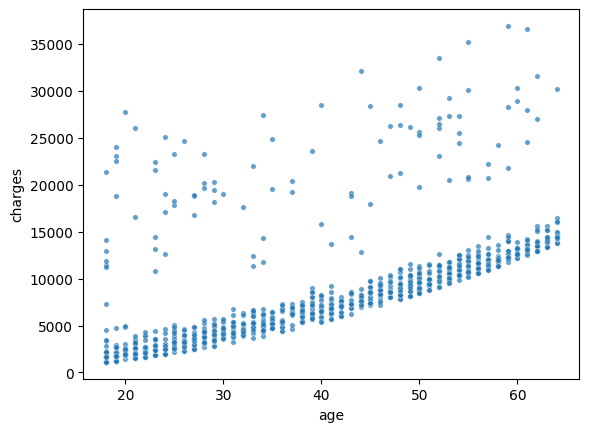

In [13]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

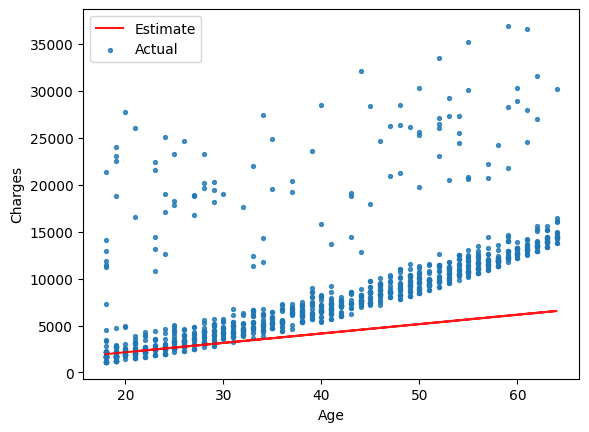

In [14]:
try_parameters(non_smoker_df, 100, 150)

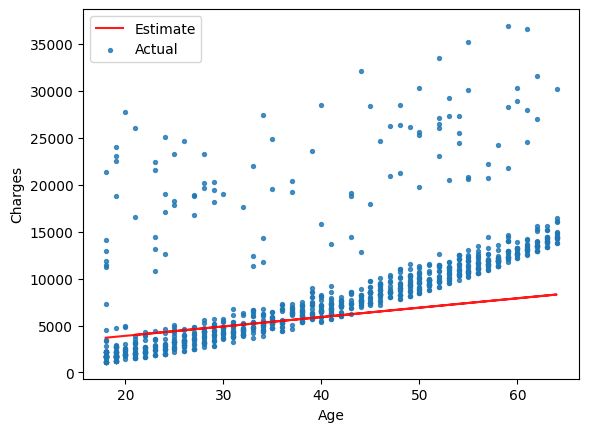

In [15]:
try_parameters(non_smoker_df, 100, 1900)

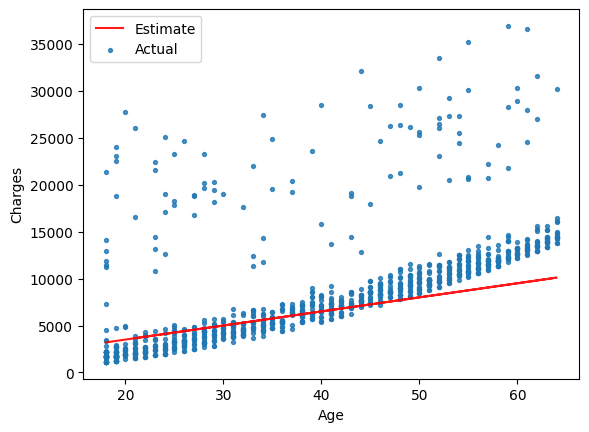

In [36]:
try_parameters(non_smoker_df, 150, 500)

**Спостереження**


*   Результат не дуже далекий до цільового, але нахил лінії не співпадає з загальним трендом, з чого можна зробити висновок, що w має бути зміненим відповідним чином.



**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [16]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [19]:
targets = non_smoker_df['charges']
predicted_1 = estimate_charges(non_smoker_df.age, 100, 150)
predicted_2 = estimate_charges(non_smoker_df.age, 100, 1900)
predicted_3 = estimate_charges(non_smoker_df.age, 150, 500)

rmse_1 = rmse(targets, predicted_1)
rmse_2 = rmse(targets, predicted_2)
rmse_3 = rmse(targets, predicted_3)

(rmse_1, rmse_2, rmse_3)

(6794.646996002013, 5832.637240462938, 5345.05777032744)

**Висновок**:
* З випробуваних пар параметрів найкращий (найменший) результат показала пара  150, 500 зі значенням втрат 5345.06.
* Загальна стратегія для знаходження кращих значень  𝑤  та  𝑏  методом проб та помилок - з кожною ітерацією візуалізувати зміни та прораховувати 𝑤  та  𝑏, намагаючись наблизитись мінімізувати rmse. Можна скористатись МНК чи градієнтним спуском.